Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Preprocessing

In [2]:
import pathlib

dirname = os.path.dirname(pathlib.Path().resolve())
filename = "data\spotify_songs.csv"
data = pd.read_csv(os.path.join(dirname, filename))

data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [16]:
print(data.shape)
data.dtypes

(32833, 23)


track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [21]:
print(data["key"].unique())
print(data["mode"].unique())
print(data["playlist_name"].unique())
print(data["playlist_genre"].unique())

[ 6 11  1  7  8  5  4  2  0 10  9  3]
[1 0]
['Pop Remix' 'Dance Pop' 'Dance Room' 'Cardio' 'Dance Pop Hits'
 'Pop Warmup 130 BPM' 'Dance Pop: Japan' 'K-Party Dance Mix'
 'Dance Pop Tunes' 'Pop / Dance' 'Todo Éxitos' '90s Dance Hits'
 'Christian Dance Party' 'Pop Dance Hits' 'Best of 2019 Dance Pop: Japan'
 'Ultimate Indie Presents... Best Indie Tracks of the 2010s'
 'TUNES DANCE AND POP' 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s'
 'ELETRIC POP & DANCE' 'Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop'
 'The Sound of Post-Teen Pop' 'Post teen pop'
 'post-teen alternative, indie, pop (large variety)'
 'Pop Punk | Post-Hardcore' 'Post pop teen' 'Intro to Post-Teen Pop'
 '🤩🤪Post Teen Pop🤪🤩' 'Someone You Loved Lewis Capaldi (Pop Music Mix)'
 "Dr. Q's Prescription Playlist💊" 'a taste of the mainstream'
 'post teen pop' 'BALLARE - رقص' 'Post Teen Pop' 'Post-Teen Pop'
 'Post-teen pop' 'post-teen pop' 'Electro Pop | Electropop'
 'Electropop Hits  2017-2020' 'Electropop 2019' 'ELECTROPO

In [ ]:
# TODO map string variables?

In [23]:
from sklearn.model_selection import train_test_split

## Test data
train, test = train_test_split(data, test_size=0.15, random_state=42)

## Validation data
labels = train['danceability']
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.15, random_state=42)


In [24]:
print(X_train.isna().any(axis=0))
print(X_train.isnull().any(axis=0))

track_id                    False
track_name                   True
track_artist                 True
track_popularity            False
track_album_id              False
track_album_name             True
track_album_release_date    False
playlist_name               False
playlist_id                 False
playlist_genre              False
playlist_subgenre           False
danceability                False
energy                      False
key                         False
loudness                    False
mode                        False
speechiness                 False
acousticness                False
instrumentalness            False
liveness                    False
valence                     False
tempo                       False
duration_ms                 False
dtype: bool
track_id                    False
track_name                   True
track_artist                 True
track_popularity            False
track_album_id              False
track_album_name             True
tr

In [ ]:
# TODO: check null / na values

In [ ]:
# TODO: check ranges and distribution for numeric variables

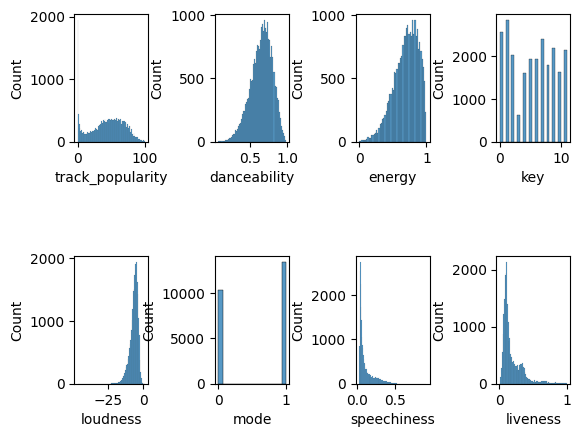

In [30]:
X_train["track_popularity"].max()
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.9)
ax = fig.add_subplot(2, 4, 1)
sns.histplot(X_train["track_popularity"], bins = 100, ax=ax)
ax = fig.add_subplot(2, 4, 2)
sns.histplot(X_train["danceability"], ax=ax)
ax = fig.add_subplot(2, 4, 3)
sns.histplot(X_train["energy"],ax=ax)
ax = fig.add_subplot(2, 4, 4)
sns.histplot(X_train["key"],ax=ax)
ax = fig.add_subplot(2, 4, 5)
sns.histplot(X_train["loudness"], bins = 100,ax=ax)
ax = fig.add_subplot(2, 4, 6)
sns.histplot(X_train["mode"], ax=ax)
ax = fig.add_subplot(2, 4, 7)
sns.histplot(X_train["speechiness"],ax=ax)
ax = fig.add_subplot(2, 4, 8)
sns.histplot(X_train["liveness"],ax=ax)
plt.show()

In [ ]:
# TODO: log transform the not even distributed variables??
